
<font size="10">Assignment 1</font>

In [31]:
# import all the libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [32]:
# load csv
df = pd.read_csv("https://raw.githubusercontent.com/kaka5050/MBAN-6110/main/Asg%201/sales_data.csv")

In [33]:
# show the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      946 non-null    object 
 2   Price       945 non-null    float64
 3   Units Sold  946 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


There are 1050 rows

In [34]:
# show the describtion of the data
df.describe(include='all')

,Product,Region,Price,Units Sold,Sale Date
count,947,946,945.000000,946.000000,1050
unique,50,10,NaN,NaN,1000
top,Product_45,Region_9,NaN,NaN,2022-07-28
freq,28,109,NaN,NaN,2
mean,NaN,NaN,107.598688,10.048626,NaN
std,NaN,NaN,124.020322,3.172261,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,29.430000,8.000000,NaN
50%,NaN,NaN,78.130000,10.000000,NaN
75%,NaN,NaN,142.570000,12.000000,NaN


-There are 50 products selling in 10 Regions

# Data Cleaning: Drop rows with missing values and duplicated rows

In [35]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     900 non-null    object 
 1   Region      900 non-null    object 
 2   Price       900 non-null    float64
 3   Units Sold  900 non-null    float64
 4   Sale Date   1000 non-null   object 
dtypes: float64(2), object(3)
memory usage: 46.9+ KB


In [36]:
# show how many rows are having missing value in each column
null_counts = df.isnull().sum()
print(null_counts)

Product       100
Region        100
Price         100
Units Sold    100
Sale Date       0
dtype: int64


There are + 100 of null values in the 4 columns excluding 'Sales Date', so I will try to clean up all the rows with null value and see how many rows are remaining.

In [37]:
# clean all the rows with null value and see how many rows are left in the cleaned data
df_clean_noNull = df.dropna()
rows_left = df_clean_noNull.count()
print(rows_left)

Product       651
Region        651
Price         651
Units Sold    651
Sale Date     651
dtype: int64


In [11]:
# calculate the percentage of rows being cleaned up 
1 - 687/1050

0.34571428571428575

<p>If I clean up all the rows with null value, I am cleaning up close to 35% of rows. I think this is too much.</p> 
<P>I will try to remove the rows with null value in column 'Products' and 'Region' instead of all the rows with null value. See how many percent of data are left.</p>

In [38]:
# remove all the rows with null value in column 'Product' and 'Region'
df_clean_ProductRegion = df.dropna(subset=['Product','Region'])
df_clean_ProductRegion.reset_index(drop=True, inplace=True)
df_clean_ProductRegion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     810 non-null    object 
 1   Region      810 non-null    object 
 2   Price       725 non-null    float64
 3   Units Sold  731 non-null    float64
 4   Sale Date   810 non-null    object 
dtypes: float64(2), object(3)
memory usage: 31.8+ KB


In [39]:
810/1050

0.7714285714285715

<p>df_clean_ProductRegion - 77% of rows remaining</p>
<p>Less rows are being removed using the above data cleaning approch than clean up all the missing value rows.</p> 
<p>Therefore, I will clean up the rows with missing value in 'Product' and 'Region', as I am going to analyze the performance of the Products and Regions, and I am able to fill the missing value for these 2 columns</p>

# Data Cleaning: Remove outliers

### Price Column

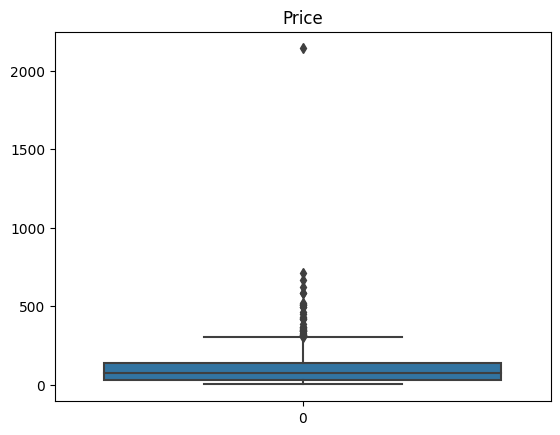

In [40]:
# reset all the index
df_clean_ProductRegion.reset_index(drop=True, inplace=True)

# plot boxplot for 'Price' column
sns.boxplot(df_clean_ProductRegion['Price'])

# set plot title
plt.title('Price')

# show the plot
plt.show()

The boxplot shows there is outlier

In [41]:
# find the mean and sd of Price column
df_clean_ProductRegion.describe(include = 'all')

,Product,Region,Price,Units Sold,Sale Date
count,810,810,725.000000,731.000000,810
unique,50,10,NaN,NaN,810
top,Product_5,Region_9,NaN,NaN,2022-01-03
freq,28,96,NaN,NaN,1
mean,NaN,NaN,106.942331,10.103967,NaN
std,NaN,NaN,129.246684,3.229169,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,29.000000,8.000000,NaN
50%,NaN,NaN,76.010000,10.000000,NaN
75%,NaN,NaN,139.560000,12.000000,NaN


In [43]:
# calculate the outlier: Mean + 3*sd value of Price column
outlier_price = 108.624987 + 3*122.623788	

In [48]:
df_clean_ProductRegion = df_clean_ProductRegion.drop(df_clean_ProductRegion[df_clean_ProductRegion['Price'] > outlier_price].index)

# reset the index
df_clean_ProductRegion.reset_index(drop=True, inplace=True)

df_clean_ProductRegion.describe(include = 'all')

,Product,Region,Price,Units Sold,Sale Date
count,798,798,713.000000,721.000000,798
unique,50,10,NaN,NaN,798
top,Product_5,Region_9,NaN,NaN,2022-01-03
freq,28,95,NaN,NaN,1
mean,NaN,NaN,97.038317,10.108183,NaN
std,NaN,NaN,88.083512,3.241990,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,28.450000,8.000000,NaN
50%,NaN,NaN,74.270000,10.000000,NaN
75%,NaN,NaN,134.580000,12.000000,NaN


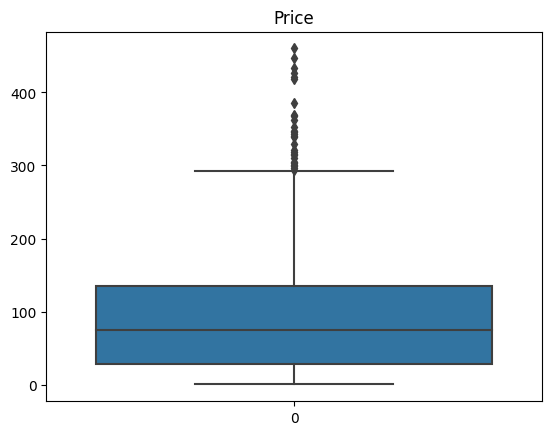

In [49]:
# plot the boxplot again
sns.boxplot(df_clean_ProductRegion['Price'])

# set plot title
plt.title('Price')

# show plot
plt.show()

### Units Sold column

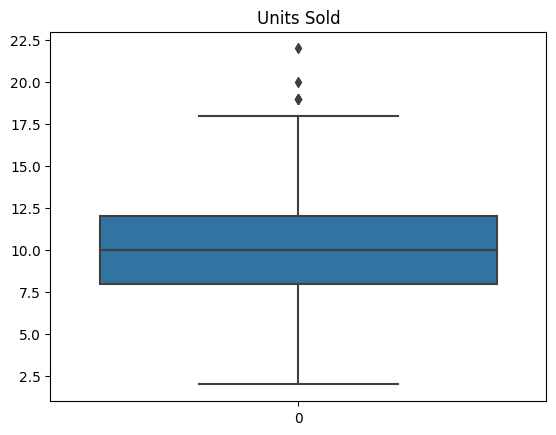

In [50]:
# reset the index
df_clean_ProductRegion.reset_index(drop=True, inplace=True)

# plot the boxplot of the 'Units Sold' column
sns.boxplot(data = df_clean_ProductRegion['Units Sold'])

# set plot title
plt.title('Units Sold')

# show the plot
plt.show()

# Fill Null value for Price and Unit sold columns

In [51]:
df_clean_ProductRegion.isnull().sum()

Product        0
Region         0
Price         85
Units Sold    77
Sale Date      0
dtype: int64

In [22]:
# fill missing value in Unit Sold column with mean and check if there are missing value in the column
mean_unit_PR = df_clean_ProductRegion['Units Sold'].mean()
df_clean_ProductRegion.loc[:, 'Units Sold'] = df_clean_ProductRegion['Units Sold'].copy().fillna(mean_unit_PR)
df_clean_ProductRegion.isnull().sum()

Product       0
Region        0
Price         0
Units Sold    0
Sale Date     0
dtype: int64

In [23]:
# fill missing value in Price column with mean and check if there are missing value in the column
mean_price_PR = df_clean_ProductRegion['Price'].mean()
df_clean_ProductRegion.loc[:, 'Price'] = df_clean_ProductRegion['Price'].copy().fillna(mean_price_PR)
df_clean_ProductRegion.isnull().sum()

Product       0
Region        0
Price         0
Units Sold    0
Sale Date     0
dtype: int64

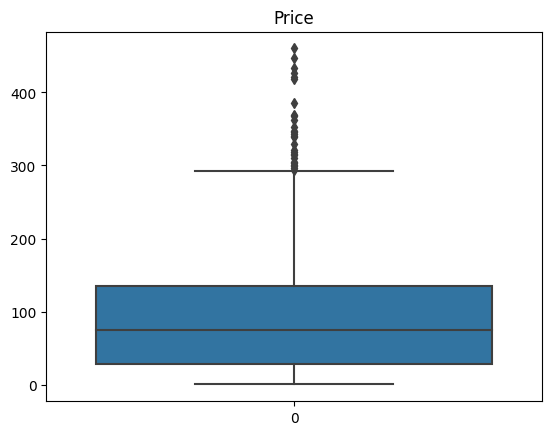

In [24]:
# plot box plot for Price column
df_clean_ProductRegion.reset_index(drop=True, inplace=True)
sns.boxplot(data = df_clean_ProductRegion['Price'])
plt.title('Price')

plt.show()

In [25]:
# find the mean and sd of Price column
df_clean_ProductRegion.describe(include = 'all')

,Product,Region,Price,Units Sold,Sale Date
count,713,713,713.000000,713.000000,713
unique,50,10,NaN,NaN,713
top,Product_5,Region_9,NaN,NaN,2022-01-03
freq,27,92,NaN,NaN,1
mean,NaN,NaN,97.038317,10.062402,NaN
std,NaN,NaN,88.083512,3.028772,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,28.450000,8.000000,NaN
50%,NaN,NaN,74.270000,10.000000,NaN
75%,NaN,NaN,134.580000,12.000000,NaN


In [26]:
# calculate the Mean + 2sd value of Price column
108.624987 + 3*122.623788	

476.496351

In [27]:
# count the number of data has price >  Mean Price + 2sd
df_clean_ProductRegion[df_clean_ProductRegion['Price'] > 353.872563].count()

Product       10
Region        10
Price         10
Units Sold    10
Sale Date     10
dtype: int64

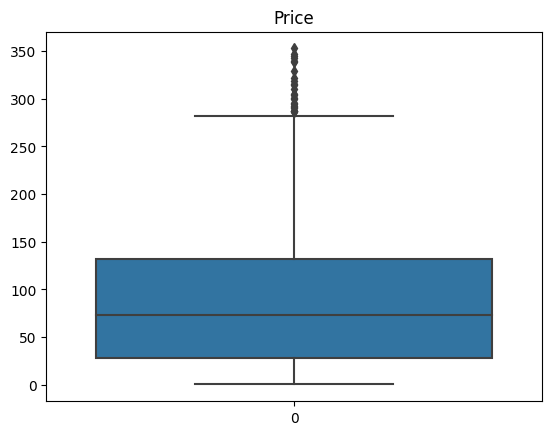

In [28]:
# drop all the rows with Price > 354 and show the boxplot
df_clean_ProductRegion = df_clean_ProductRegion[df_clean_ProductRegion['Price'] <= 354]
df_clean_ProductRegion.reset_index(drop=True, inplace=True)
sns.boxplot(df_clean_ProductRegion['Price'])
plt.title('Price')

plt.show()

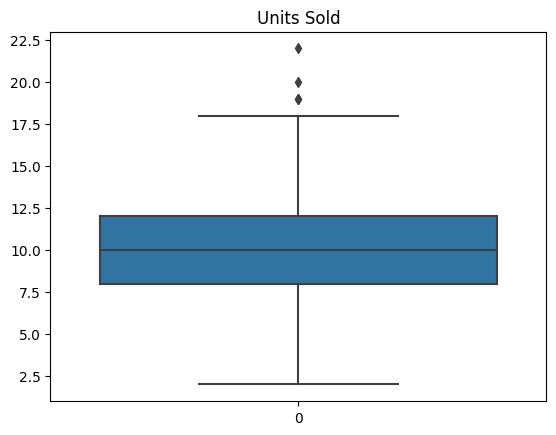

In [29]:
# plot box plot for Unis Sold column
df_clean_ProductRegion.reset_index(drop=True, inplace=True)
sns.boxplot(data = df_clean_ProductRegion['Units Sold'])
plt.title('Units Sold')

plt.show()

In [30]:
sns.lmplot(data = df_clean_ProductRegion, x = 'Price', y = 'Revenue', fit_reg=True)

KeyError: "['Revenue'] not in index"

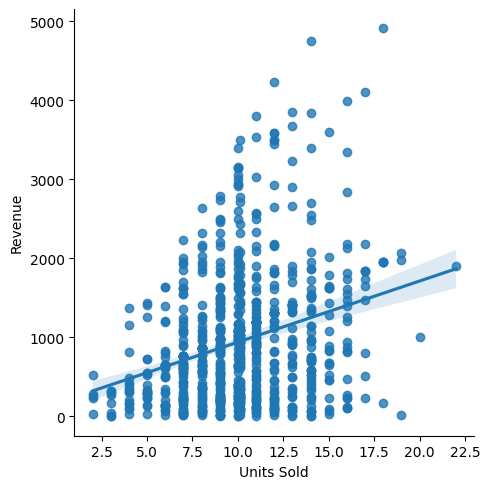

In [ ]:
sns.lmplot(data = df_clean_ProductRegion, x = 'Units Sold', y = 'Revenue', fit_reg=True)

In [ ]:
# create Revenue column
df_clean_ProductRegion.loc[:, 'Revenue'] = df_clean_ProductRegion['Price'] * df_clean_ProductRegion['Units Sold']

# Product Revenue

In [ ]:
# create dataframe group by Product and sort the dataframe by the Revenue in Descending order
df_clean_P_Revenue = df_clean_ProductRegion.groupby('Product')['Revenue'].sum().reset_index()
df_clean_P_Revenue = df_clean_P_Revenue.sort_values('Revenue', ascending=False)
print(df_clean_P_Revenue)

       Product       Revenue
11   Product_2  24154.412306
45  Product_50  21746.255300
12  Product_20  21134.542857
42  Product_48  20948.020000
33   Product_4  20742.353491
4   Product_13  20592.838640
35  Product_41  20158.199424
24  Product_31  20076.220000
5   Product_14  20027.037612
23  Product_30  19646.872503
47   Product_7  19616.609529
21  Product_29  19560.603733
40  Product_46  19354.763524
10  Product_19  18740.449738
38  Product_44  18591.589605
44   Product_5  17931.596484
27  Product_34  17810.465768
30  Product_37  17651.001244
17  Product_25  17438.346083
43  Product_49  17336.050000
26  Product_33  17289.259343
7   Product_16  17193.979817
46   Product_6  16328.941197
34  Product_40  15903.212685
8   Product_17  15760.391672
16  Product_24  15491.586916
1   Product_10  15487.219893
0    Product_1  15392.274542
37  Product_43  15153.056540
15  Product_23  14959.522249
48   Product_8  14555.392348
20  Product_28  14179.575329
19  Product_27  14162.149601
36  Product_42

In [ ]:
df_clean_P_Revenue.describe(include='all')

,Product,Revenue
count,50,50.000000
unique,50,NaN
top,Product_2,NaN
freq,1,NaN
mean,NaN,15696.457338
std,NaN,4134.948563
min,NaN,4985.664908
25%,NaN,13180.629944
50%,NaN,15625.989294
75%,NaN,19201.185077


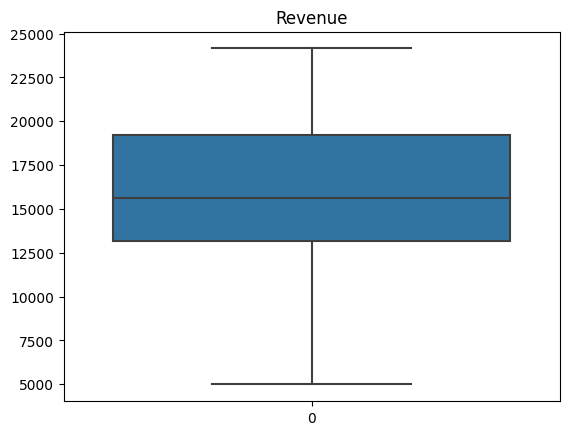

In [ ]:
df_clean_P_Revenue.reset_index(drop=True, inplace=True)
sns.boxplot(data = df_clean_P_Revenue['Revenue'])
plt.title('Revenue')

plt.show()

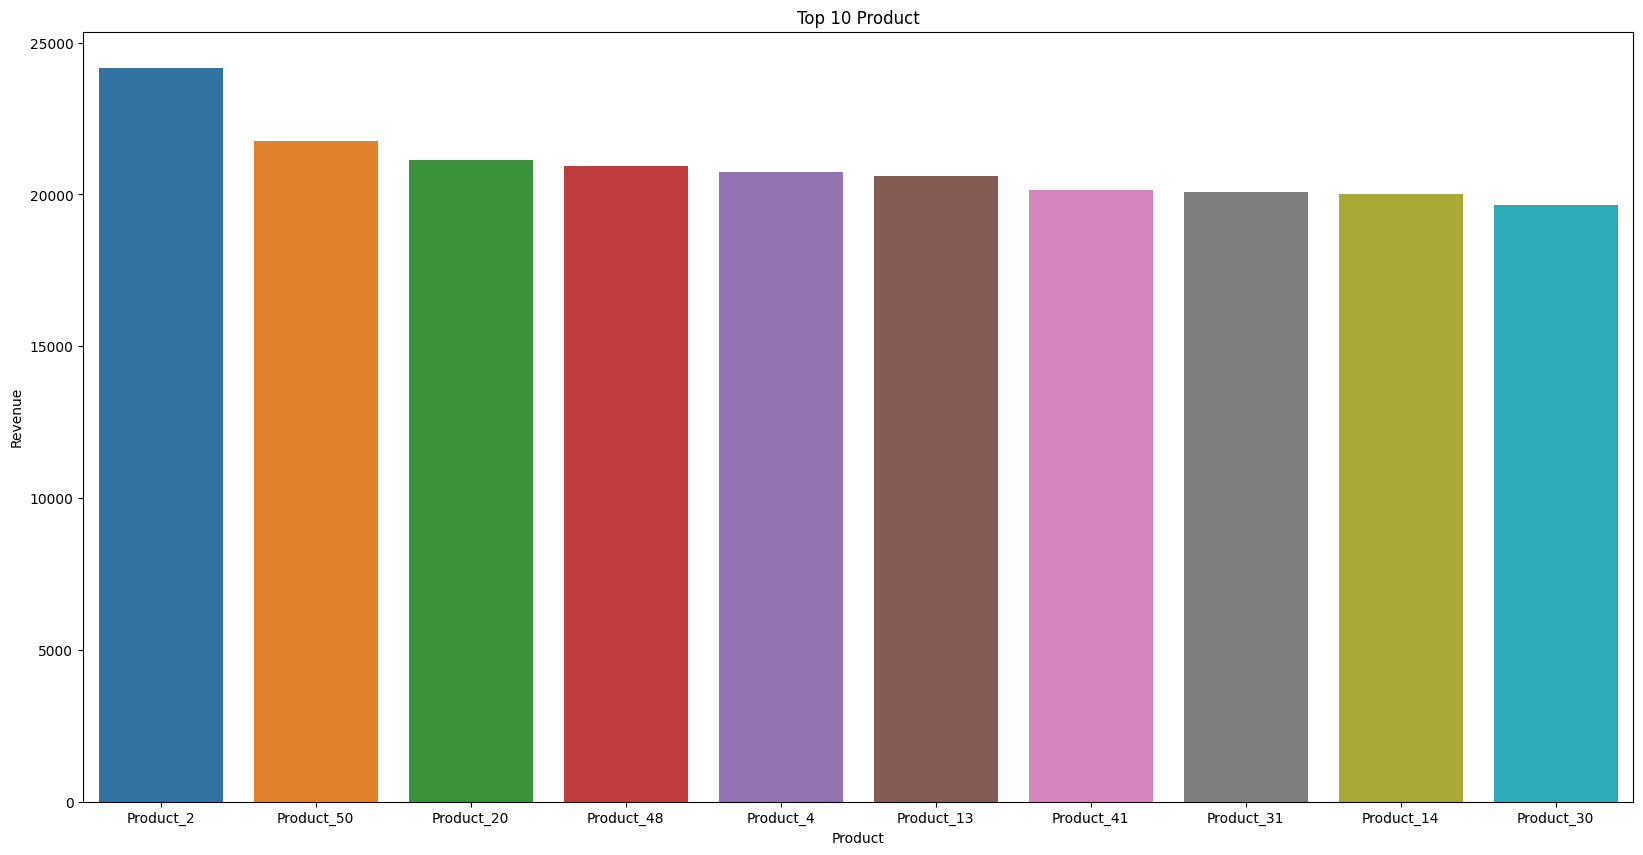

In [ ]:
# Select top 10 Products
Top10_Product = df_clean_P_Revenue.head(10)

plt.figure(figsize=(20, 10))
sns.barplot(x='Product', y='Revenue', data = Top10_Product, errorbar=None)
plt.title('Top 10 Product')
plt.show()


# Region Revenue

In [ ]:
# create dataframe group by Region sort the dataframe by the Revenue in Descending order
df_clean_R_Revenue = df_clean_ProductRegion.groupby('Region')['Revenue'].sum().reset_index()
df_clean_R_Revenue = df_clean_R_Revenue.sort_values('Revenue', ascending=False)
print(df_clean_R_Revenue)

      Region        Revenue
9   Region_9  105771.843194
5   Region_5   88027.537963
4   Region_4   85985.726955
1  Region_10   83704.702299
8   Region_8   82880.780947
2   Region_2   81804.477153
3   Region_3   76429.889189
6   Region_6   64506.339222
0   Region_1   59488.692246
7   Region_7   56222.877720


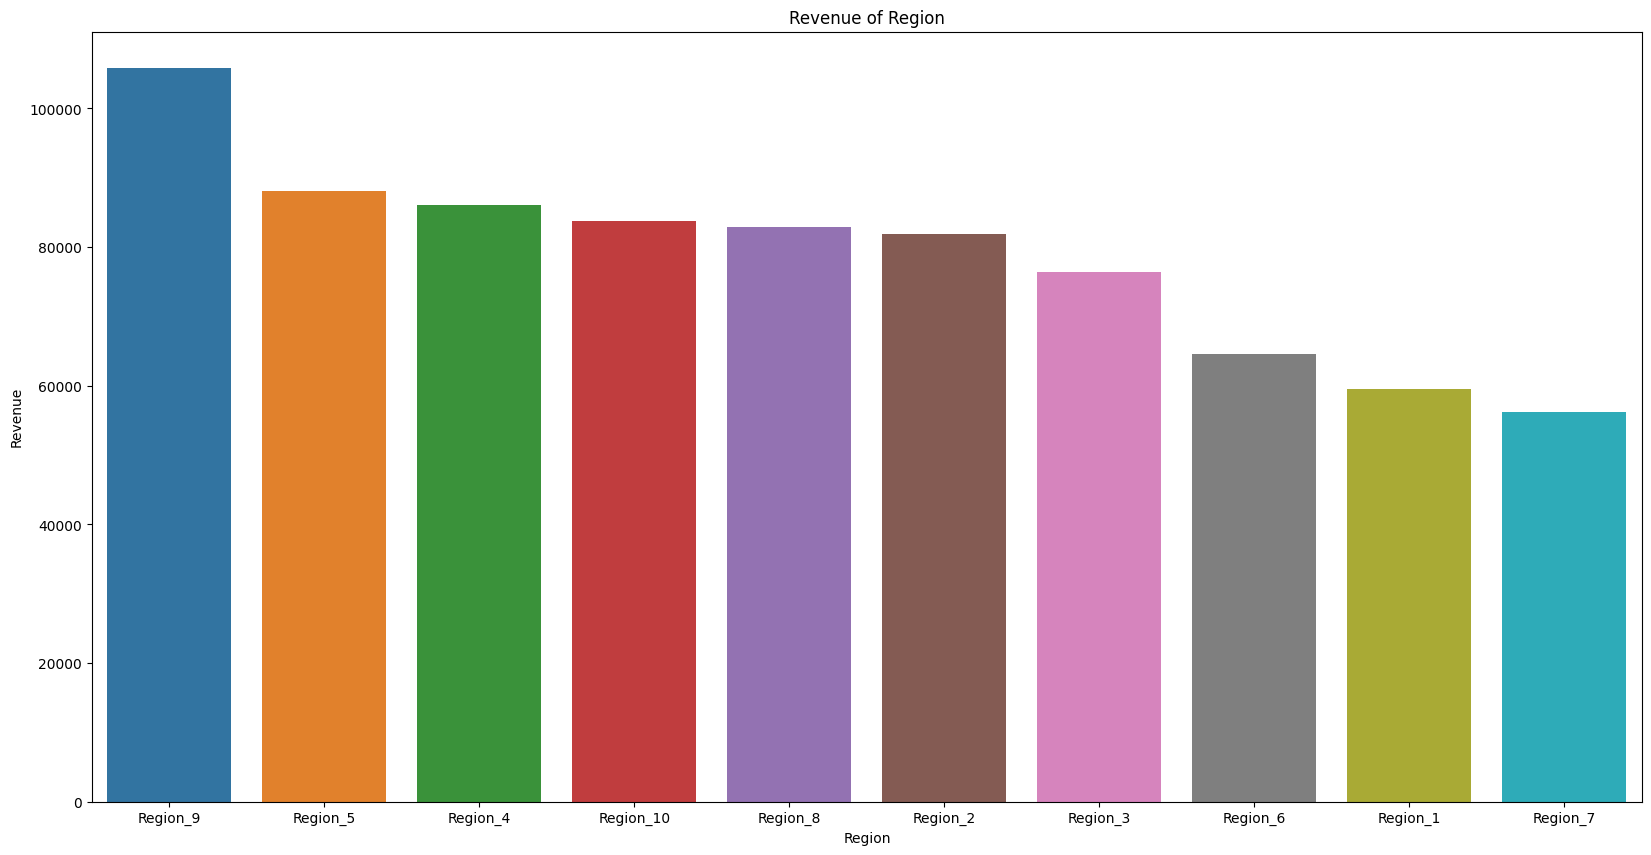

In [ ]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Region', y='Revenue', data = df_clean_R_Revenue, errorbar=None)
plt.title('Revenue of Region')
plt.show()

# Product Region Revenue

In [ ]:
# create dataframe group by product
df_clean_PR_Revenue = df_clean_ProductRegion.groupby(['Product' , 'Region'])[['Revenue' , 'Units Sold']].sum().reset_index()
print(df_clean_PR_Revenue)

       Product     Region      Revenue  Units Sold
0    Product_1   Region_1  3071.100000   42.000000
1    Product_1  Region_10   707.520000    8.000000
2    Product_1   Region_2  2340.754882   30.000000
3    Product_1   Region_3  3236.089869   18.000000
4    Product_1   Region_4  1572.730000   33.000000
..         ...        ...          ...         ...
401  Product_9   Region_5   885.510000   25.000000
402  Product_9   Region_6   159.232685   10.090791
403  Product_9   Region_7  2091.540000   11.000000
404  Product_9   Region_8  1073.970000    9.000000
405  Product_9   Region_9    22.410000    9.000000

[406 rows x 4 columns]


In [ ]:
product_2_rows = df_clean_PR_Revenue[df_clean_PR_Revenue['Product'] == 'Product_2'].sort_values('Revenue', ascending=False)
product_2_rows

,Product,Region,Revenue,Units Sold
93,Product_2,Region_2,5246.070000,26.000000
98,Product_2,Region_9,5197.150000,27.000000
95,Product_2,Region_4,4481.147580,19.090791
92,Product_2,Region_10,2987.999896,41.090791
94,Product_2,Region_3,2747.219921,17.000000
91,Product_2,Region_1,2389.170000,43.000000
96,Product_2,Region_7,760.374908,7.000000
97,Product_2,Region_8,345.280000,13.000000


In [ ]:
region_9_rows = df_clean_PR_Revenue[df_clean_PR_Revenue['Region'] == 'Region_9'].sort_values('Revenue', ascending=False)
region_9_rows

,Product,Region,Revenue,Units Sold
269,Product_4,Region_9,6517.300000,60.000000
278,Product_40,Region_9,5806.870000,43.000000
98,Product_2,Region_9,5197.150000,27.000000
215,Product_33,Region_9,4813.710000,47.000000
189,Product_30,Region_9,4807.380000,29.000000
49,Product_14,Region_9,4745.300000,14.000000
31,Product_12,Region_9,4448.810000,25.000000
296,Product_42,Region_9,4252.097951,31.090791
248,Product_37,Region_9,4118.611375,41.090791
373,Product_50,Region_9,4029.710000,30.000000


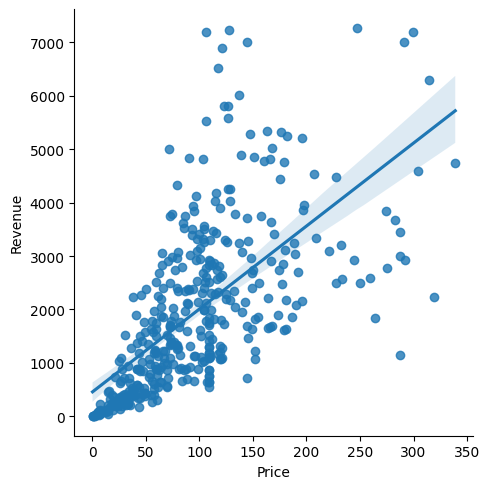

In [ ]:
sns.lmplot(data = df_clean_PR_Revenue, x = 'Price', y = 'Revenue', fit_reg=True)

In [ ]:
df_clean_ProductRegion

,Product,Region,Price,Units Sold,Sale Date,Revenue
0,Product_46,Region_3,20.430000,12.0,2022-01-03,245.160000
1,Product_36,Region_1,12.770000,10.0,2022-01-04,127.700000
2,Product_17,Region_6,125.690000,6.0,2022-01-05,754.140000
3,Product_45,Region_1,8.630000,11.0,2022-01-06,94.930000
4,Product_31,Region_3,23.730000,6.0,2022-01-07,142.380000
...,...,...,...,...,...,...
823,Product_48,Region_10,23.570000,6.0,2024-02-28,141.420000
824,Product_45,Region_7,78.690000,8.0,2022-07-28,629.520000
825,Product_1,Region_6,108.624987,8.0,2022-08-02,868.999895
826,Product_17,Region_2,114.370000,11.0,2023-12-18,1258.070000
